In [109]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

# supernovae_lst = pd.read_csv("./TESS_data/sn_count_transients_s1-47 (4).txt")
transient_lst = pd.read_csv("./TESS_data/AT_count_transients_s1-47 (4).txt")

In [150]:
light_curves = os.listdir("./TESS_data/light_curves_fausnaugh")
# name = light_curves[random.randint(0, len(light_curves)-1)]
# print(light_curves[i])
name = "lc_2021ffv_cleaned"
curve = pd.read_csv("./TESS_data/light_curves_fausnaugh/" + name, delim_whitespace=True)

def display_curve(col):
    curve.plot.scatter(x="BTJD", y=col, c="00000", alpha=0.5, yerr=curve["e_cts"], ylabel="Flux", xlabel="Barycentric TESS Julian Date")

curve

,BTJD,TJD,cts,e_cts,bkg,bkg_model,bkg2,e_bkg2
0,2255.43241,2255.42381,-3913.5151,1746.5320,-7778.8286,-957.2410,-3074.8014,1746.5320
1,2255.43935,2255.43076,-1302.6772,1651.7833,-15163.8725,-957.2410,-1677.0051,1651.7833
2,2255.44630,2255.43770,-5558.5614,1579.4196,-12559.8275,-862.2199,-1853.1788,1579.4196
3,2255.45324,2255.44465,-5201.1907,1545.6618,-9795.4020,-862.2199,-975.5032,1545.6618
4,2255.46019,2255.45159,-4656.8604,1491.1987,-10265.7694,-862.2199,-1261.8694,1491.1987
...,...,...,...,...,...,...,...,...
3260,2279.95358,2279.94463,-892.2956,492.6440,-596.1100,87.0189,-799.2964,492.6440
3261,2279.96052,2279.95158,-1165.7576,486.6418,-48.3486,87.0189,-1130.8672,486.6418
3262,2279.96747,2279.95852,64.4877,494.5034,-523.0452,87.0189,93.1176,494.5034
3263,2279.97441,2279.96547,-312.1240,485.0165,475.5604,87.0189,-251.5197,485.0165


Preprocessing steps
1. Sigma Clipping: remove points with flux uncertainties more than 3 sigma from mean uncertainty, repeat clipping 5 times

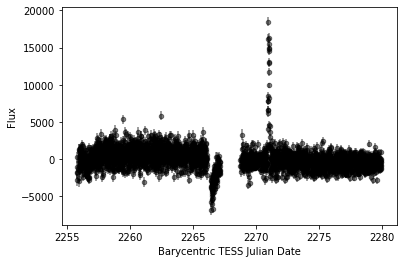

In [146]:
for _ in range(0, 5):
    uncert_mean = curve.e_cts.mean()
    threshold = 3*curve.e_cts.std()
    curve = curve[np.abs(curve['e_cts'] - uncert_mean) <= threshold]

display_curve("cts")

2. Subtract background Flux

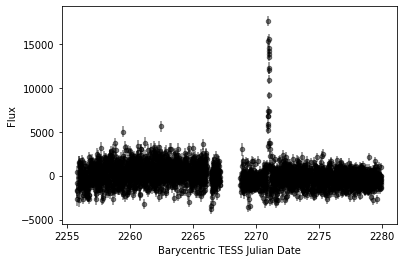

In [147]:
curve['no_bkg_cts'] = curve['cts'] - curve['bkg_model']
display_curve('no_bkg_cts')

3. Correct for milky way extinction using Fitzpatrick Reddening function
Wavelength of TESS passband is between 600-1000nm

In [ ]:
tess_wavelength = 6215 #in armstrongs
R = 3.1 #extinction law
curve['unreddended_cts'] = curve.no_bkg_cts

4. Normalize Data

<AxesSubplot:xlabel='Barycentric TESS Julian Date', ylabel='Flux'>

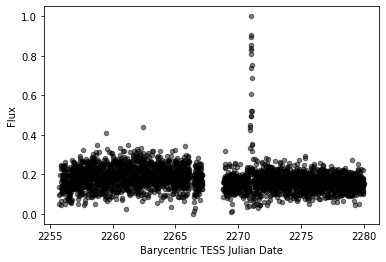

In [148]:
curve['normalized_cts'] = (curve.no_bkg_cts - curve.no_bkg_cts.min()) / (curve.no_bkg_cts.max()-curve.no_bkg_cts.min())
curve.plot.scatter(x="BTJD", y='normalized_cts', c="00000", alpha=0.5, ylabel="Flux", xlabel="Barycentric TESS Julian Date")

5. Bin data (May be needed)

Model Setup